In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import numpy as np

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
#Change directory to read csv
movies = pd.read_csv('../a/movies.csv')

In [4]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

movies = movies.dropna()

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Change budget and gross to int
movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')

In [8]:
#Creating correct year column
movies['yearCorrect'] = movies['released'].str.extract(pat='([0-9]{4})').astype(int)

In [17]:
movies = movies.sort_values(by=['gross'],inplace=False,ascending=False)

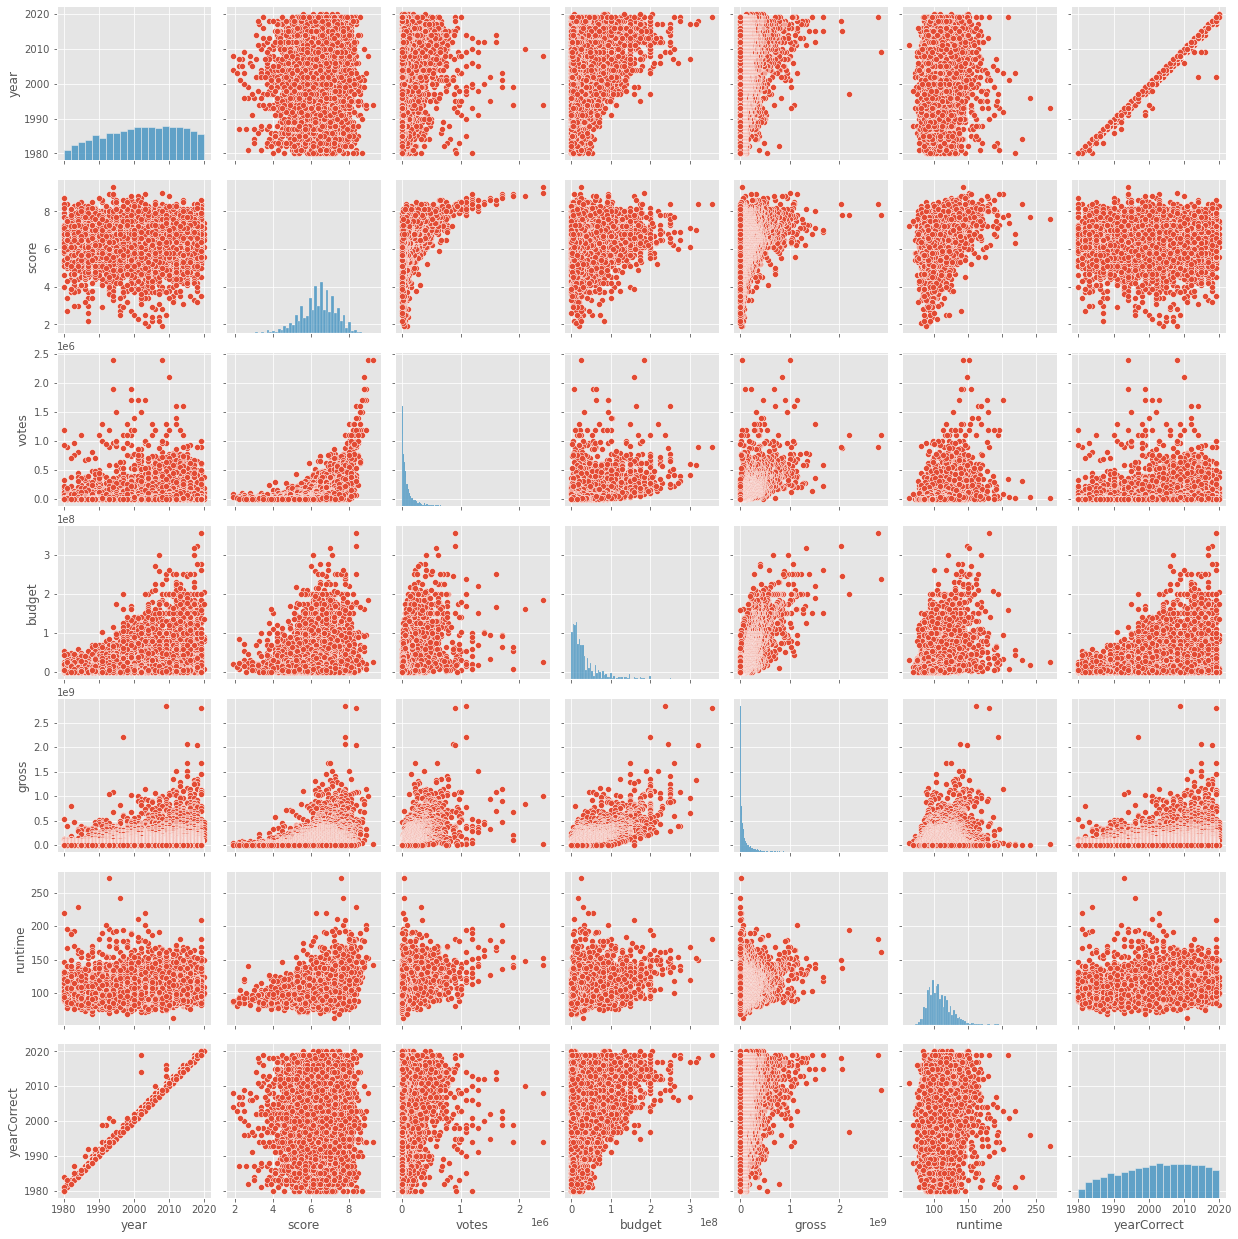

In [18]:
sns.pairplot(movies)

### Seaborn vs. Pyplot

[Text(0.5, 0, 'Budget'),
 Text(0, 0.5, 'Gross Revenue'),
 Text(0.5, 1.0, 'Budget v. Gross')]

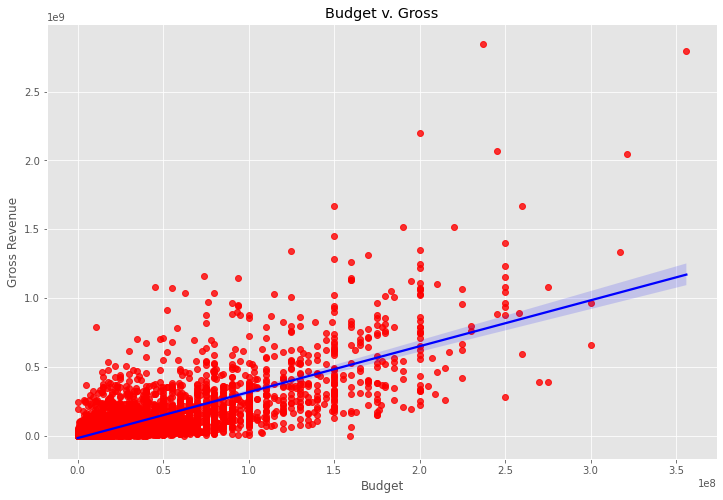

In [29]:
plot = sns.regplot(data= movies,x='budget',y='gross', scatter_kws={'color':'red'},line_kws={'color':'blue'})
plot.set(xlabel='Budget',ylabel='Gross Revenue',title='Budget v. Gross')



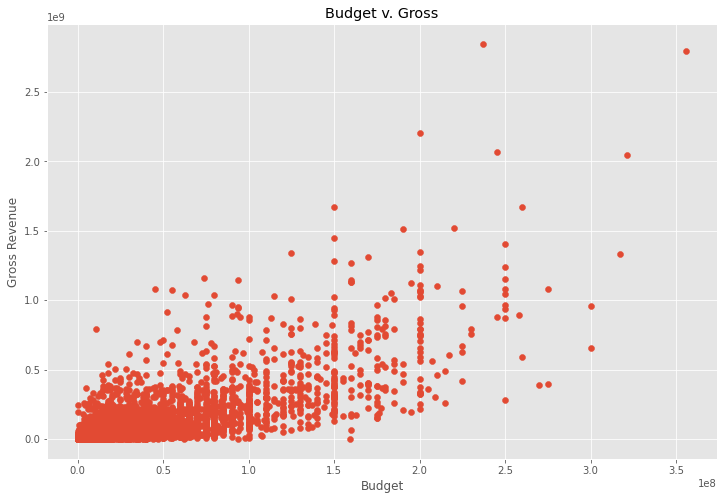

In [27]:
plt.scatter(x=movies['budget'],y=movies['gross'])
plt.title('Budget v. Gross')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

In [31]:
movies.corr()
'''possible correlatsions:
    score - votes
    score - runtime
    votes - budget
    votes - gross
    budget - gross'''

'possible correlatsions:\n    score - votes\n    score - runtime\n    votes - budget\n    votes - gross\n    budget - gross'

[Text(0.5, 51.0, 'Movie Attributes'),
 Text(87.0, 0.5, 'Movie Attributes'),
 Text(0.5, 1.0, 'Correlation of Numeric Values')]

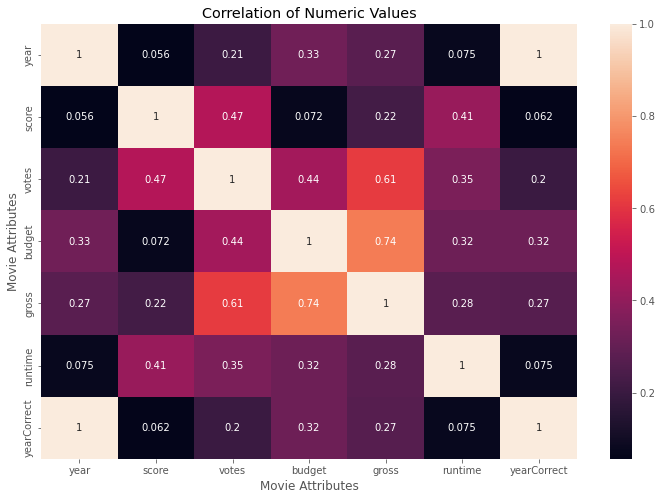

In [33]:
corrMatrix = movies.corr()

hMap = sns.heatmap(corrMatrix, annot=True)
hMap.set(xlabel='Movie Attributes', ylabel='Movie Attributes', title='Correlation of Numeric Values')

In [35]:
#convert data to numeric for correlation analysis
moviesConverted = movies

for col in moviesConverted.columns:
    if(moviesConverted[col].dtype == 'object'):
        moviesConverted[col] = moviesConverted[col].astype('category')
        moviesConverted[col] = moviesConverted[col].cat.codes

moviesConverted

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,2015
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,1994
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,2001
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,1982


[Text(0.5, 51.0, 'Movie Attributes'),
 Text(87.0, 0.5, 'Movie Attributes'),
 Text(0.5, 1.0, 'Correlation of Converted Values')]

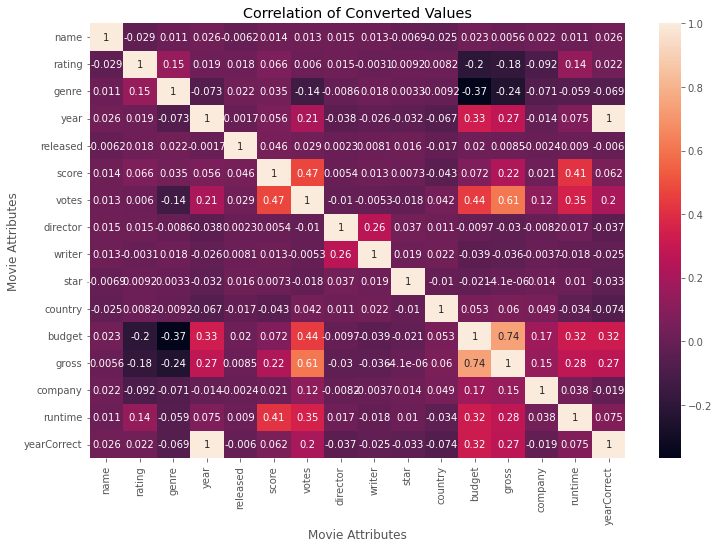

In [36]:
from matplotlib.pyplot import title


corrMatrixConverted = moviesConverted.corr()
hMapConverted = sns.heatmap(corrMatrixConverted, annot=True)
hMapConverted.set(xlabel='Movie Attributes', ylabel='Movie Attributes', title='Correlation of Converted Values')

#No new correlations observed

In [38]:
corrMatrixUnstack = moviesConverted.corr().unstack()
corrMatrixUnstack

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
                              ...   
yearCorrect  budget         0.320312
             gross          0.268721
             company       -0.018806
             runtime        0.075294
             yearCorrect    1.000000
Length: 256, dtype: float64

In [39]:
corrSorted = corrMatrixUnstack.sort_values()
corrSorted

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearCorrect  yearCorrect    1.000000
Length: 256, dtype: float64

In [40]:
highCorr = corrSorted[(corrSorted)> 0.5]
highCorr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearCorrect    0.998726
yearCorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearCorrect  yearCorrect    1.000000
dtype: float64